# Terrorism dataset exploration

### Introduction - dataset description

#### This notebook contains analyses of terrorism dataset which comes from Global Terrorism Database (GDT), an open-source database maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.  The dataset includes  information on terrorist attacks around the world from 1970 through 2016 (2017 in progress). It contains more than 100 variables on location, tactics, perpetrators, targets, and outcomes and provides with information on more than 170,000 terrorist attacks. The sources of the data are unclassified media articles. The dataset is saved in csv file, encoding: ISO-8859-1 - you can download it from here: https://www.kaggle.com/START-UMD/gtd.

### Data import

In [1]:
#showing analyses in this window
%matplotlib inline

#libraries and settings import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from textwrap import wrap

#reading the file
file = pd.read_csv('globalterrorismdb_0617dist.csv', encoding='ISO-8859-1')

### 1. How does terrorism by region trend look like?

Text(0.5,1,'Terrorism per region')

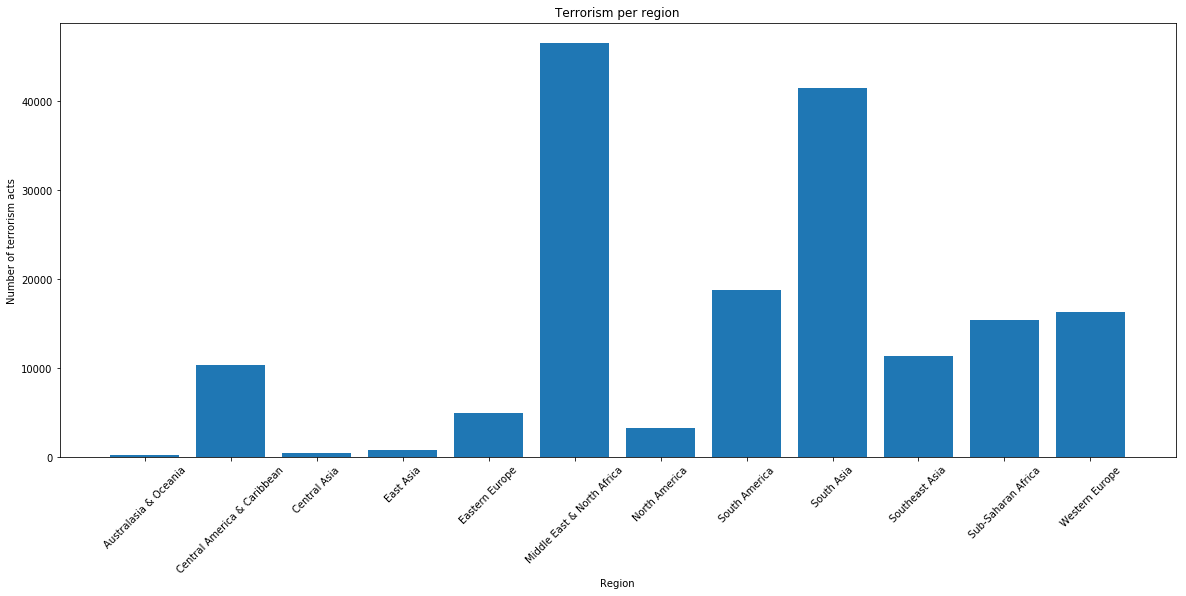

In [2]:
#counting grouped rows
count_region = file.groupby(['region_txt']).count()

#drawing the plot
plt.figure(figsize = (20,8))
plt.bar(count_region.index, count_region.eventid)
plt.ylabel('Number of terrorism acts')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.title('Terrorism per region')

### 2. How does terrorism by year trend look like in Western Europe? 

Text(0.5,1,'Terrorism per year in Western Europe')

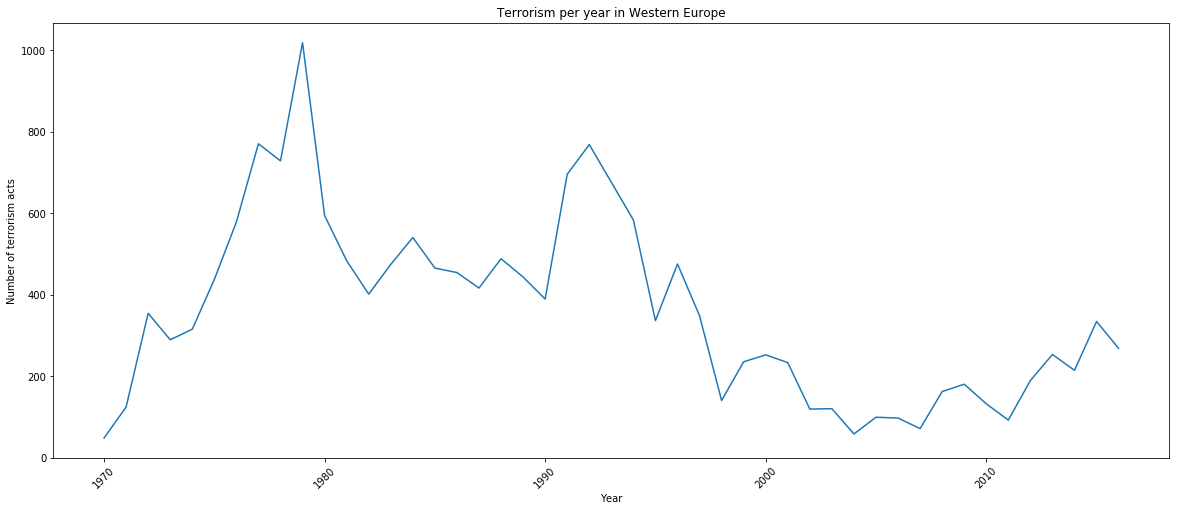

In [3]:
#selecting data concerning Western Europe
europa_data = file[(file.region_txt == 'Western Europe')]

#counting grouped rows
count_year = europa_data.groupby(['iyear']).count()

#drawing the plot
plt.figure(figsize = (20,8))
plt.plot(count_year.index, count_year.eventid)
plt.ylabel('Number of terrorism acts')
plt.xlabel('Year')
#rotating labels - too long region names
plt.xticks(rotation=45)
plt.title('Terrorism per year in Western Europe')

### 3. How does use of different weapons trend look like?

Text(0.5,1,'Use of weapons')

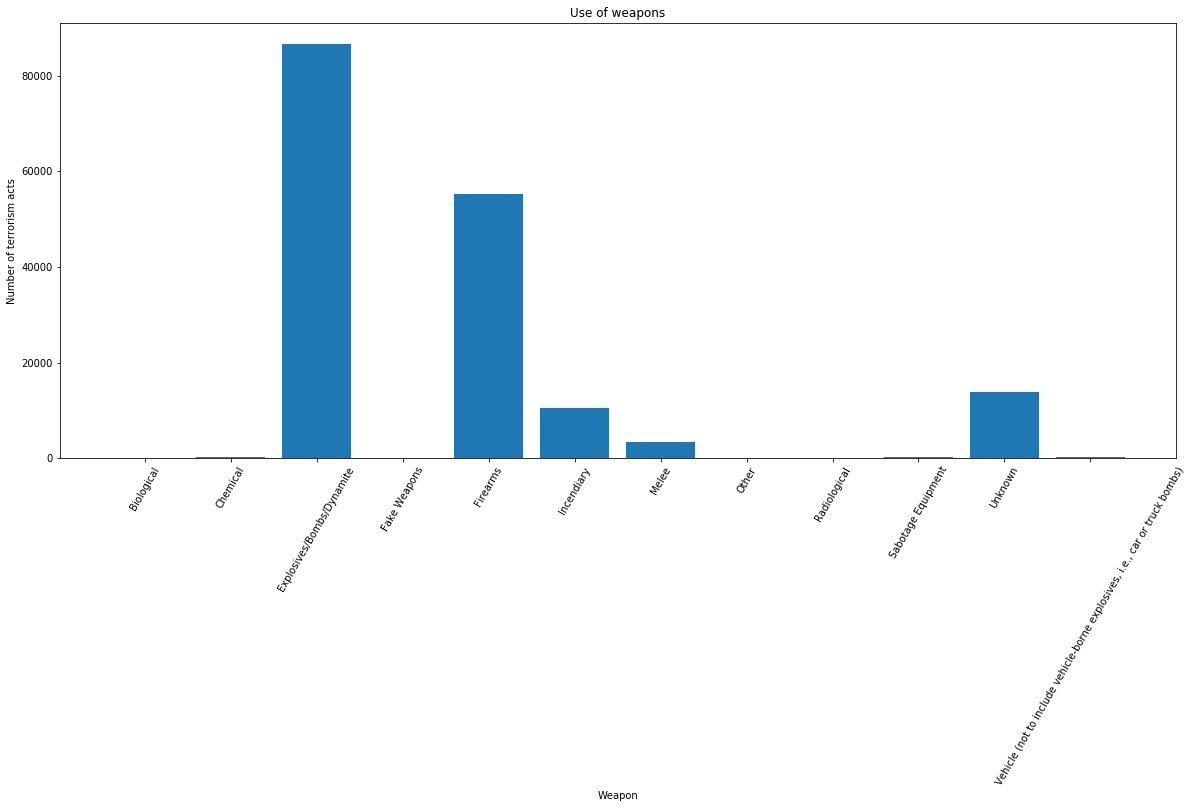

In [4]:
#counting grouped rows
count_weap = file.groupby(['weaptype1_txt']).count()

#drawing the plot
plt.figure(figsize = (20,8))
plt.bar(count_weap.index, count_weap.eventid)
plt.ylabel('Number of terrorism acts')
plt.xlabel('Weapon')
#rotating labels
plt.xticks(rotation=60)
plt.title('Use of weapons')

### 4. How does suicide trend look like?

Text(0.5,1,'Number of suicides')

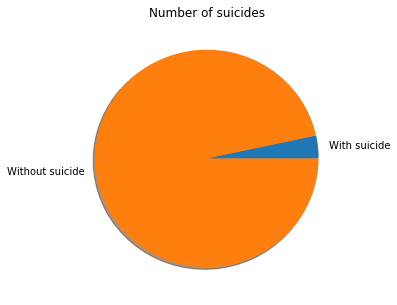

In [5]:
#counting suicides
suic_data = file.loc[(file['suicide'] == 1)]
count_suic = suic_data['suicide'].count()

#counting acts of terrorism without suicide
nsuic_data = file.loc[(file['suicide'] == 0)]
count_nsuic = nsuic_data['suicide'].count()

#drawing the plot
plt.figure(figsize = (5,5))
labels='With suicide','Without suicide'
plt.pie([count_suic,count_nsuic],labels=labels,shadow=True)
plt.title('Number of suicides')

### 5. How does killed/wounded people by target trend look like?

Text(0,0.5,'Number of people')

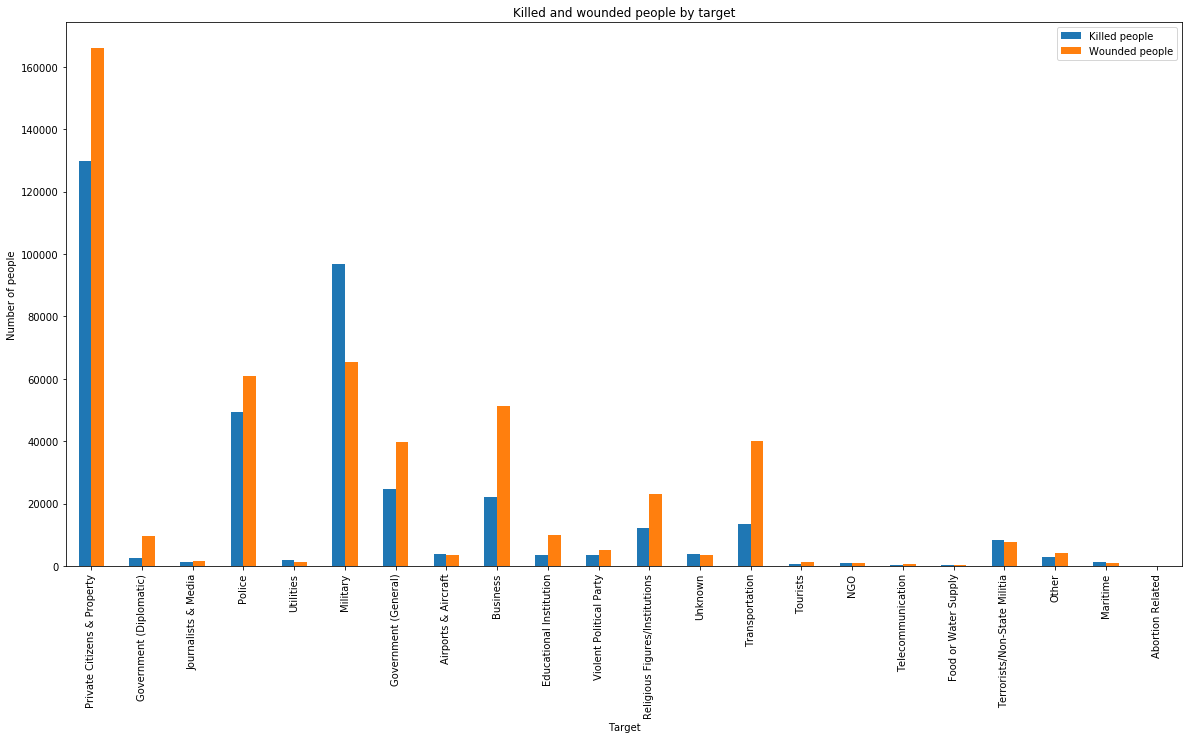

In [6]:
#counting killed people grouped by target
df1 = pd.DataFrame({'Target': file['targtype1_txt'], 'Killed people': file['nkill']})
plot1=df1.groupby(['Target'], sort=False).sum()

#counting wounded people grouped by target
df2 = pd.DataFrame({'Target': file['targtype1_txt'], 'Wounded people': file['nwound']})
plot2=df2.groupby(['Target'], sort=False).sum()

#drawing the plot
bar=pd.concat([plot1,plot2],axis=1).plot.bar(figsize=(20,10), title ="Killed and wounded people by target" )
bar.set_ylabel("Number of people")